In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [21]:
df_infos_discentes = pd.read_csv('dados-pessoais-discentes.csv', sep=';')

/home/mariana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [249]:
cursos = ['ENGENHARIA CIVIL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA ELÉTRICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA AMBIENTAL',
         'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA MECÂNICA', 'ENGENHARIA DE ALIMENTOS', 'ENGENHARIA TÊXTIL', 'ENGENHARIA DE PETRÓLEO', 'CIÊNCIA DA COMPUTAÇÃO', 
         'CIÊNCIAS E TECNOLOGIA', 'TECNOLOGIA DA INFORMAÇÃO', 'ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA DE TELECOMUNICAÇÕES', 'ENGENHARIA DE SOFTWARE',
         'ENGENHARIA BIOMEDICA']

In [23]:
#filtrando os cursos desejados
df_infos_discentes=df_infos_discentes[df_infos_discentes.curso.isin(cursos)]

In [24]:
#filtrando dados de 2006 pra frente
df_infos_discentes = df_infos_discentes[df_infos_discentes.ano_ingresso>=2006]

In [25]:
#filtrando dados nulos de ano de nascimento
df_infos_discentes = df_infos_discentes[~df_infos_discentes.ano_nascimento.isna()]

In [26]:
#excluindo valor de ano_ingressante muito difente
df_infos_discentes = df_infos_discentes[df_infos_discentes.id_discente!='3f5164bbb233309022051d0628ee14d1']

In [27]:
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].astype(int)

In [28]:
# tratando os valores de ano de nascimento
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].apply(lambda row: '19'+str(row) if row<100 else str(row))

In [29]:
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].replace('199','1999')
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].replace('994','1994')
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].replace('1194','1994')

In [30]:
# transformando novamente para int 
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].astype(int)
# calculando idade
df_infos_discentes['idade_quando_ingressou'] = df_infos_discentes.apply(lambda row: row.ano_ingresso - row.ano_nascimento, axis=1)

In [31]:
df_infos_discentes['estado_origem'] = df_infos_discentes.estado_origem.fillna('Não Informado')

In [19]:
df_infos_discentes.to_csv('estado-origem-discentes.csv', index=False)

In [32]:
df_infos_discentes = df_infos_discentes[df_infos_discentes['sexo']!='false']

### GRAFICO VIOLINO DA IDADE

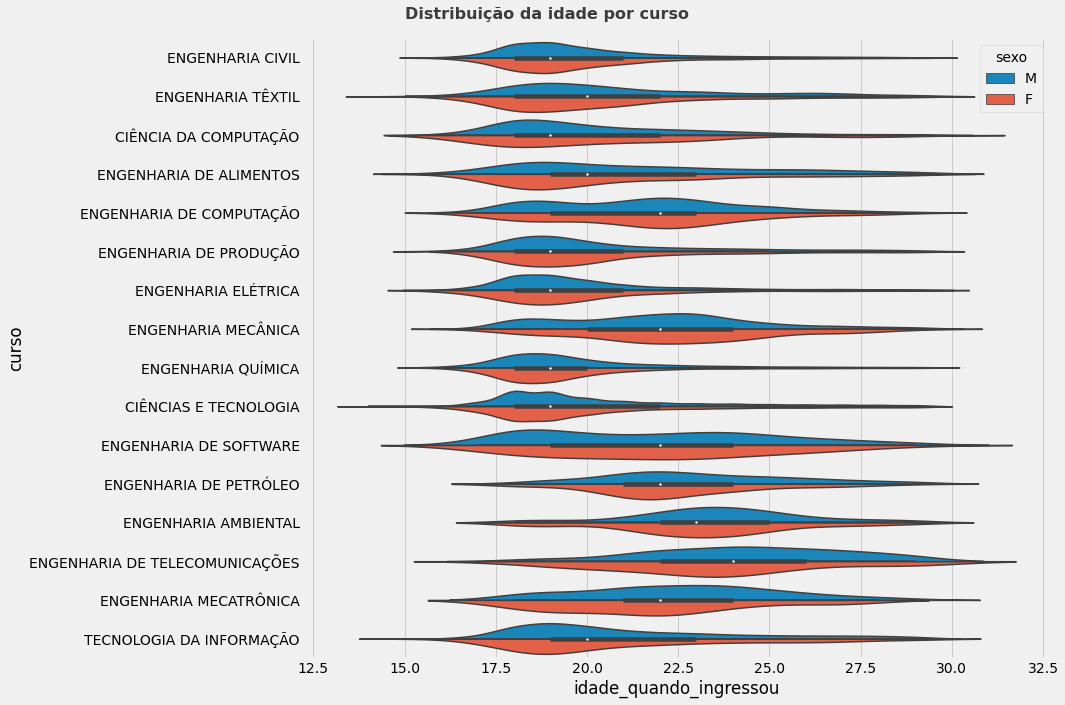

In [485]:
import matplotlib.pyplot as plt;
import matplotlib.collections
import seaborn as sns
import pandas as pd

style.use('fivethirtyeight')

plt.figure(figsize=(15,10))
cores = {'M':'#87CEEB','F':'#6A5ACD'}
sns.violinplot(data=df_infos_discentes[['sexo','curso','idade_quando_ingressou']][df_infos_discentes.idade_quando_ingressou<30], x='idade_quando_ingressou', y='curso', 
                    hue='sexo', split=True, inner='box', linewidth=1.5, pallet=cores)
plt.text(x = 15, y = -1,
    s = '''Distribuição da idade por curso''',
               fontsize = 16, weight = 'bold', alpha = .75)
# plt.text(x = 10, y = 16,
#     s = '''©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                             UFRN-2022''',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
# #rotate x-axis labels

plt.tight_layout()
# plt.savefig('imagens/idade-curso-violino2', format='png')

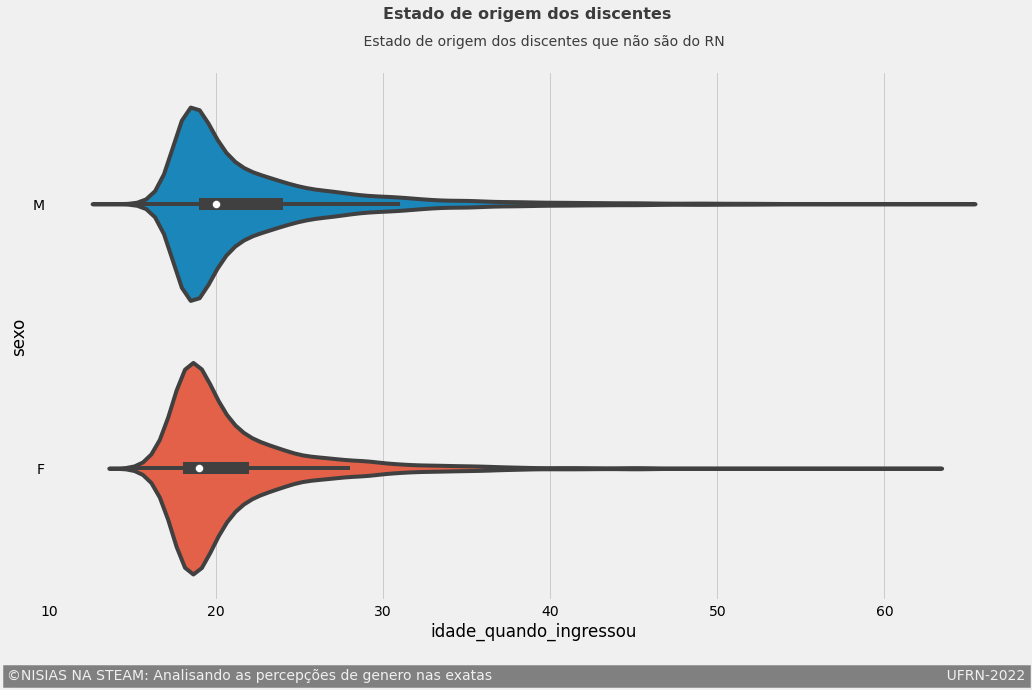

In [481]:
style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

sns.violinplot(data=df_infos_discentes[['sexo','curso','idade_quando_ingressou']], x='idade_quando_ingressou', y='sexo'
               , split=True, inner='box', linewidth=4, colors=['#87CEEB','#6A5ACD'])
plt.text(x = 30, y = -0.7,
    s = '''Estado de origem dos discentes''',
               fontsize = 16, weight = 'bold', alpha = .75)
plt.text(x = 28, y = -0.6,
    s = '''   Estado de origem dos discentes que não são do RN''',
               fontsize = 14, alpha = .75)
plt.text(x = 7.5, y = 1.8,
    s = '''©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                                                                     UFRN-2022''',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels

plt.tight_layout()
# plt.savefig('imagens/idade-t', format='png')

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 
'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr',
'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn',
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r',
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r',
'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r',
'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 
'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

palette="YlGnBu_r"

In [235]:
#calculando média de idade por curso dos discentes por sexo
df_idade_media_discentes = df_infos_discentes[['sexo','curso','idade_quando_ingressou',]].groupby(['curso','sexo']).agg(lambda i: sum(i)/len(list(i))).reset_index()

In [236]:
df_idade_media_discentes = df_idade_media_discentes[df_idade_media_discentes.sexo!='false']

In [246]:
df_infos_discentes

,id_discente,sexo,ano_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,forma_ingresso,ano_ingresso,periodo_ingresso,cotista,curso,tipo_cota,descricao_tipo_cota,idade_quando_ingressou
94292,5b3f4757a29f99834fd7d64ec6294359,M,1980,Branco,Rondônia,GUAJARÁ-MIRIM,Rio Grande do Norte,NATAL,PONTA NEGRA,GRADUAÇÃO,TRANSFERÊNCIA VOLUNTÁRIA,2006,1.0,f,ENGENHARIA CIVIL,NaN,NaN,26
94304,9c3049755df86970b6ea98a52d54c20d,F,1966,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,NEOPOLIS,GRADUAÇÃO,REINGRESSO DE GRADUADO,2006,1.0,f,ENGENHARIA TÊXTIL,NaN,NaN,40
94308,871a498ddd32d4950d9f5512c21e0ab1,F,1976,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,LAGOA NOVA,GRADUAÇÃO,REINGRESSO DE GRADUADO,2006,1.0,f,ENGENHARIA QUÍMICA,NaN,NaN,30
94345,d3829d082ee22214907a4cbe7060573b,F,1979,Branco,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,LAGOA NOVA,GRADUAÇÃO,REINGRESSO DE GRADUADO,2006,1.0,f,ENGENHARIA TÊXTIL,NaN,NaN,27
94356,ad15533eeafe8dd2fe52077e2c866fb1,M,1952,Pardo,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PITIMBU,GRADUAÇÃO,REINGRESSO DE GRADUADO,2006,1.0,f,ENGENHARIA CIVIL,NaN,NaN,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451797,192a336d1c8bd1d8d342db9de57b227d,M,1981,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,C MACIO,GRADUAÇÃO,REINGRESSO DE GRADUADO,2010,1.0,f,ENGENHARIA DE PETRÓLEO,NaN,NaN,29
452672,c7f3cc8d29bda809430a07d6154c833b,M,1986,Branco,São Paulo,SÃO PAULO,Rio Grande do Norte,NATAL,CAPIM MACIO,GRADUAÇÃO,TRANSF. COMPULSORIA,2010,2.0,f,ENGENHARIA DE COMPUTAÇÃO,NaN,NaN,24
452743,5e389717e7a58fff64d3d4becc758c25,M,1989,Branco,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,CANDELÁRIA,GRADUAÇÃO,TRANSF. COMPULSORIA,2010,2.0,f,ENGENHARIA MECÂNICA,NaN,NaN,21
452745,1abbabcb96e26008b347f51740aeb010,M,1989,Branco,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,LAGOA NOVA,GRADUAÇÃO,TRANSFERÊNCIA VOLUNTÁRIA,2010,2.0,f,ENGENHARIA CIVIL,NaN,NaN,21


#### a média de idade das mulheres é menor q a dos homens. pode ser que mais homens façam uma segunda graduação, o q acaba elevando a média

In [237]:
df_idade_media_discentes

,curso,sexo,idade_quando_ingressou
0,CIÊNCIA DA COMPUTAÇÃO,F,20.935484
1,CIÊNCIA DA COMPUTAÇÃO,M,21.200000
2,CIÊNCIAS E TECNOLOGIA,F,20.990213
3,CIÊNCIAS E TECNOLOGIA,M,22.061277
5,ENGENHARIA AMBIENTAL,F,23.932039
6,ENGENHARIA AMBIENTAL,M,24.804965
7,ENGENHARIA CIVIL,F,20.246817
8,ENGENHARIA CIVIL,M,20.895607
9,ENGENHARIA DE ALIMENTOS,F,22.747630
10,ENGENHARIA DE ALIMENTOS,M,25.213687


### FORMA DE INGRESSO

In [326]:
df_infos_discentes[['sexo','curso','idade_quando_ingressou','forma_ingresso']]['forma_ingresso'].unique()

array(['TRANSFERÊNCIA VOLUNTÁRIA', 'REINGRESSO DE GRADUADO', 'VESTIBULAR',
       'CONVENIO PEC-G', 'REINGRESSO AUTOMATICO', 'TRANSF. COMPULSORIA',
       'JUDICIAL', 'REOPCAO', 'SiSU', 'REMOCAO',
       'REOCUPAÇÃO DE VAGAS RESIDUAIS', 'REINGRESSO SEGUNDO CICLO',
       'MOBILIDADE INTERNACIONAL - DUPLA TITULAÇÃO', 'ACORDO TIMOR-LESTE',
       'PROCESSO SELETIVO ESPECÍFICO'], dtype=object)

In [33]:
formas = ['REINGRESSO DE GRADUADO', 'VESTIBULAR',
       'REOPCAO', 'SiSU', 
       'REOCUPAÇÃO DE VAGAS RESIDUAIS', 'REINGRESSO SEGUNDO CICLO']
df_infos_discentes_formas = df_infos_discentes[df_infos_discentes.forma_ingresso.isin(formas)]

In [34]:
# df_infos_discentes[['sexo','forma_ingresso','idade_quando_ingressou']].groupby(['forma_ingresso','sexo']).agg(lambda i: sum(i)/len(list(i))).reset_index()
# quantidade de ingressantes de cada sexo por forma de ingresso
df_forma_ingresso_discentes = pd.crosstab(df_infos_discentes_formas['forma_ingresso'], df_infos_discentes_formas['sexo']).sort_values(by='F', ascending=False).reset_index()
df_forma_ingresso_discentes['percent_F'] = df_forma_ingresso_discentes.apply(lambda row: (row.F*100)/(row.F + row.M),axis=1)
df_forma_ingresso_discentes['percent_M'] = df_forma_ingresso_discentes.apply(lambda row: (row.M*100)/(row.F + row.M),axis=1)

In [35]:
df_forma_ingresso_discentes

sexo,forma_ingresso,F,M,percent_F,percent_M
0,SiSU,9234,23997,27.787307,72.212693
1,VESTIBULAR,2372,7079,25.097873,74.902127
2,REOCUPAÇÃO DE VAGAS RESIDUAIS,709,1882,27.363952,72.636048
3,REINGRESSO SEGUNDO CICLO,702,2221,24.016421,75.983579
4,REINGRESSO DE GRADUADO,77,133,36.666667,63.333333
5,REOPCAO,10,25,28.571429,71.428571


Text(-55, -1, '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                                      ')

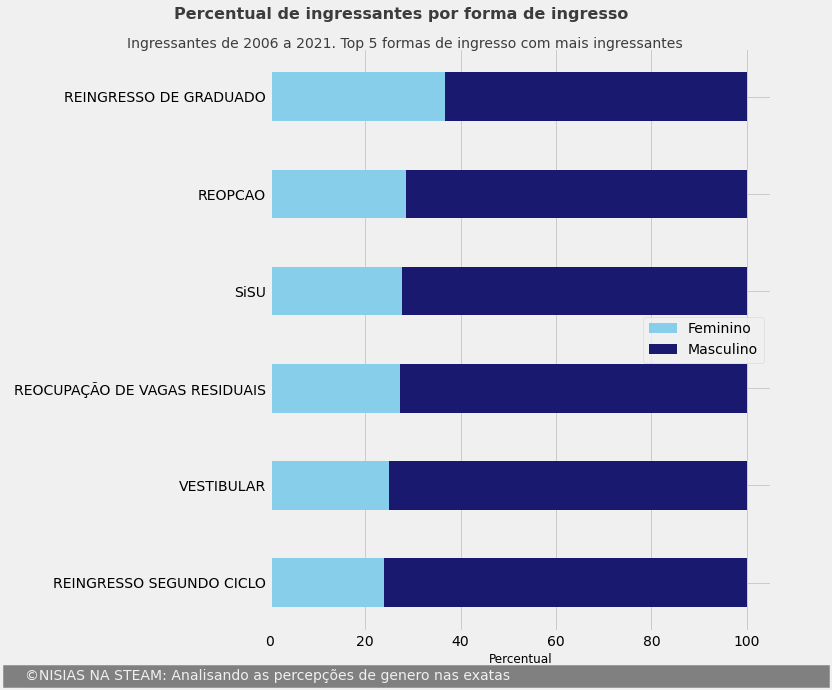

In [355]:
df_forma_ingresso_discentes[['forma_ingresso', 'percent_F', 'percent_M']].sort_values(
    by='percent_F').set_index('forma_ingresso').plot(
    kind='barh', stacked=True, color=['#87CEEB','#191970'], figsize=(8, 10))

plt.xlabel('Percentual',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -20, y = 5.8,
    s = "Percentual de ingressantes por forma de ingresso",
               fontsize = 16, weight = 'bold', alpha = .75)
plt.text(x = -30, y = 5.5,
    s = '''Ingressantes de 2006 a 2021. Top 5 formas de ingresso com mais ingressantes''',
               fontsize = 14, alpha = .75)
plt.text(x = -55, y = -1,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                                      ',
         fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

In [86]:
df_curso_forma_ingresso_discentes = df_infos_discentes[['sexo','curso','forma_ingresso']].groupby(
    ['curso','forma_ingresso']).agg(
    lambda i: (list(i))).reset_index()

In [87]:
df_curso_forma_ingresso_discentes['percent_F']=df_curso_forma_ingresso_discentes.sexo.apply(lambda row: (row.count('F')*100) / len(row))
df_curso_forma_ingresso_discentes['percent_M']=df_curso_forma_ingresso_discentes.sexo.apply(lambda row: (row.count('M')*100) / len(row))

In [88]:
df_curso_forma_ingresso_discentes['qtd_F']=df_curso_forma_ingresso_discentes.sexo.apply(lambda row: (row.count('F')))
df_curso_forma_ingresso_discentes['qtd_M']=df_curso_forma_ingresso_discentes.sexo.apply(lambda row: (row.count('M')))

In [89]:
df_curso_forma_ingresso_discentes.drop(columns=['sexo'], inplace=True)

In [90]:
df_curso_forma_ingresso_discentes['qtd_forma_ingresso'] = df_curso_forma_ingresso_discentes['qtd_F'] + df_curso_forma_ingresso_discentes['qtd_M']

In [91]:
df_curso_forma_ingresso_sisu = df_curso_forma_ingresso_discentes[(df_curso_forma_ingresso_discentes.forma_ingresso=='REINGRESSO SEGUNDO CICLO') | 
                                  (df_curso_forma_ingresso_discentes.forma_ingresso=='SiSU') |
                                  (df_curso_forma_ingresso_discentes.forma_ingresso=='VESTIBULAR')]

In [92]:
df_curso_forma_ingresso_sisu = df_curso_forma_ingresso_sisu.groupby(['curso','forma_ingresso']).agg(lambda x: x)

In [118]:
df_curso_forma_ingresso_sisu.reset_index()

,curso,forma_ingresso,percent_F,percent_M,qtd_F,qtd_M,qtd_forma_ingresso
0,CIÊNCIA DA COMPUTAÇÃO,REINGRESSO SEGUNDO CICLO,18.279570,81.720430,17,76,93
1,CIÊNCIA DA COMPUTAÇÃO,SiSU,19.298246,80.701754,22,92,114
2,CIÊNCIA DA COMPUTAÇÃO,VESTIBULAR,10.899183,89.100817,40,327,367
3,CIÊNCIAS E TECNOLOGIA,SiSU,25.813062,74.186938,4913,14120,19033
4,CIÊNCIAS E TECNOLOGIA,VESTIBULAR,22.643870,77.356130,1086,3710,4796
5,ENGENHARIA AMBIENTAL,REINGRESSO SEGUNDO CICLO,52.095808,47.904192,261,240,501
6,ENGENHARIA AMBIENTAL,SiSU,54.545455,45.454545,42,35,77
7,ENGENHARIA CIVIL,SiSU,33.138752,66.861248,738,1489,2227
8,ENGENHARIA CIVIL,VESTIBULAR,26.952141,73.047859,214,580,794
9,ENGENHARIA DE ALIMENTOS,SiSU,51.423786,48.576214,614,580,1194


<AxesSubplot:xlabel='curso,forma_ingresso'>

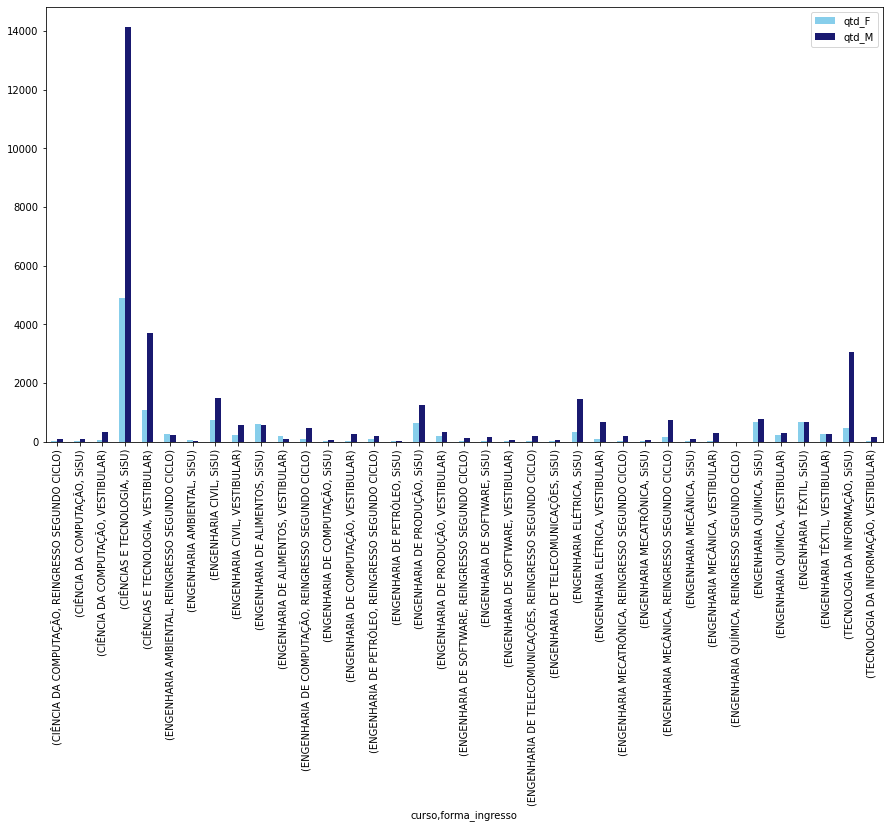

In [117]:
df_curso_forma_ingresso_sisu[['qtd_F','qtd_M']].plot(
    kind='bar', stacked=False, color=['#87CEEB','#191970'], figsize=(15, 8))

In [380]:
dado = df_curso_forma_ingresso_sisu[['forma_ingresso', 'percent_F', 'percent_M','curso']].sort_values(
    by='percent_F')
g = sns.catplot(
    data=dado, kind="bar",
    x="curso", y="forma_ingresso",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")



TypeError: Neither the `x` nor `y` variable appears to be numeric.

### RAÇA DOS DISCENTES

In [95]:
# filtrando raça diferente de null
df_raca_discentes = df_infos_discentes[~df_infos_discentes.raca.isna()]

In [214]:
df_raca_discentes_f = df_raca_discentes[df_raca_discentes.sexo=='F']
df_raca_discentes_M = df_raca_discentes[df_raca_discentes.sexo=='M']

In [243]:
pd.crosstab(df_raca_discentes_f['curso'], df_raca_discentes_f['raca'])

raca,Amarelo (de origem oriental),Branco,Indígena,Negro,Não Informado,Pardo,Remanescente de quilombo
curso,,,,,,,
CIÊNCIA DA COMPUTAÇÃO,0,41,0,2,16,34,0
CIÊNCIAS E TECNOLOGIA,25,2584,6,357,365,3098,2
ENGENHARIA AMBIENTAL,0,149,0,11,17,132,0
ENGENHARIA CIVIL,0,428,1,32,88,472,0
ENGENHARIA DE ALIMENTOS,1,281,1,43,91,427,0
ENGENHARIA DE COMPUTAÇÃO,1,61,0,7,14,47,0
ENGENHARIA DE PETRÓLEO,0,79,0,8,15,49,0
ENGENHARIA DE PRODUÇÃO,2,408,4,34,55,379,0
ENGENHARIA DE SOFTWARE,1,36,0,1,12,17,0


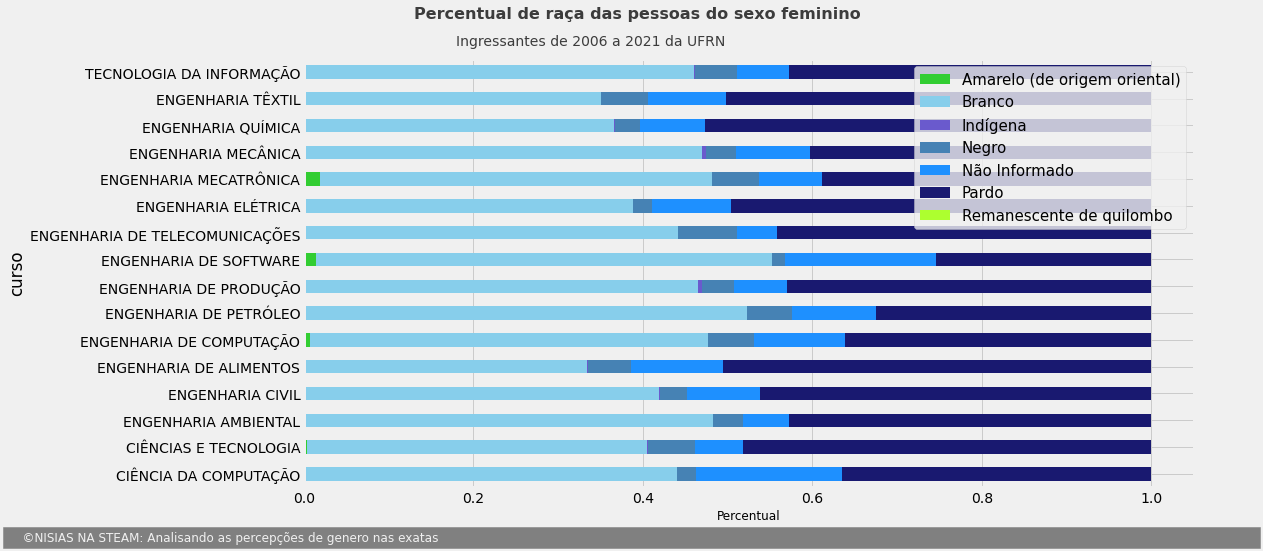

In [238]:
style.use('fivethirtyeight')
raca =pd.crosstab(df_raca_discentes_f['curso'], df_raca_discentes_f['raca'], normalize='index').reset_index().set_index('curso')
raca.plot(
    kind='barh', stacked=True, color=['#32CD32', '#87CEEB',
                                     '#6A5ACD','#4682B4', '#1E90FF', '#191970','#ADFF2F'], figsize=(18, 8))
plt.legend(raca.columns, loc='upper right', prop={'size': 15})
plt.text(x = 0.13, y = 17,
    s = "Percentual de raça das pessoas do sexo feminino",
               fontsize = 16, weight = 'bold', alpha = .75)
plt.text(x = 0.18, y = 16,
    s = '''Ingressantes de 2006 a 2021 da UFRN''',
               fontsize = 14, alpha = .75)
plt.text(x = -0.35, y = -2.5,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                                                                                                                                                                                   ',
         fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
plt.xlabel('Percentual',  fontsize=12)
plt.tight_layout()
plt.savefig('imagens/raca-f', format='png')

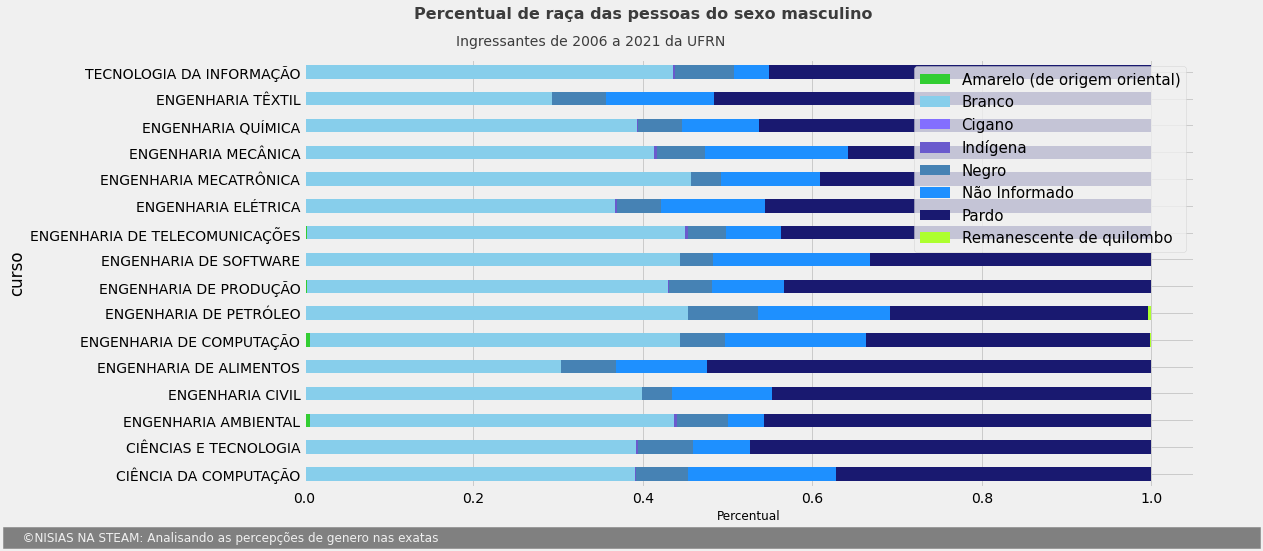

In [239]:
style.use('fivethirtyeight')
raca =pd.crosstab(df_raca_discentes_M['curso'], df_raca_discentes_M['raca'], normalize='index').reset_index().set_index('curso')
raca.plot(
    kind='barh', stacked=True, color=['#32CD32', '#87CEEB','#836FFF','#6A5ACD',
                                      '#4682B4', '#1E90FF', '#191970','#ADFF2F'], figsize=(18, 8))
plt.legend(raca.columns, loc='upper right', prop={'size': 15})
plt.text(x = 0.13, y = 17,
    s = "Percentual de raça das pessoas do sexo masculino",
               fontsize = 16, weight = 'bold', alpha = .75)
plt.text(x = 0.18, y = 16,
    s = '''Ingressantes de 2006 a 2021 da UFRN''',
               fontsize = 14, alpha = .75)
plt.text(x = -0.35, y = -2.5,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                                                                                                                                                                                   ',
         fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
plt.xlabel('Percentual',  fontsize=12)
plt.tight_layout()
plt.savefig('imagens/raca-m', format='png')

In [122]:
pd.crosstab(df_raca_discentes['curso'], df_raca_discentes['raca'], normalize='index').reset_index()

raca,curso,Amarelo (de origem oriental),Branco,Cigano,Indígena,Negro,Não Informado,Pardo,Remanescente de quilombo
0,CIÊNCIA DA COMPUTAÇÃO,0.000000,0.398074,0.000000,0.001605,0.054575,0.174960,0.370787,0.000000
1,CIÊNCIAS E TECNOLOGIA,0.002594,0.393076,0.000039,0.001336,0.062873,0.064052,0.475715,0.000314
2,ENGENHARIA AMBIENTAL,0.003384,0.456853,0.000000,0.001692,0.047377,0.049069,0.441624,0.000000
3,ENGENHARIA CIVIL,0.000000,0.404819,0.000000,0.000301,0.034940,0.107530,0.452410,0.000000
4,ENGENHARIA DE ALIMENTOS,0.000641,0.319231,0.000000,0.000641,0.057692,0.107692,0.514103,0.000000
5,ENGENHARIA DE COMPUTAÇÃO,0.007471,0.440768,0.000000,0.000000,0.053362,0.157951,0.339381,0.001067
6,ENGENHARIA DE PETRÓLEO,0.000000,0.477752,0.000000,0.000000,0.072600,0.135831,0.311475,0.002342
7,ENGENHARIA DE PRODUÇÃO,0.003124,0.438891,0.000000,0.002343,0.046076,0.077314,0.432253,0.000000
8,ENGENHARIA DE SOFTWARE,0.002315,0.458333,0.000000,0.000000,0.034722,0.185185,0.319444,0.000000
9,ENGENHARIA DE TELECOMUNICAÇÕES,0.003448,0.444828,0.000000,0.003448,0.048276,0.062069,0.437931,0.000000


In [219]:
pd.crosstab(df_raca_discentes['sexo'], df_raca_discentes['raca'], normalize='index').reset_index()

raca,sexo,Amarelo (de origem oriental),Branco,Cigano,Indígena,Negro,Não Informado,Pardo,Remanescente de quilombo
0,F,0.002593,0.403478,0.000000,0.001144,0.047822,0.070551,0.474182,0.000229
1,M,0.002128,0.394092,0.000028,0.001447,0.060900,0.083262,0.457886,0.000255
2,false,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000


In [419]:
df_estado_origem = pd.crosstab(df_raca_discentes['estado_origem'],df_raca_discentes['sexo']).sort_values(by='F').reset_index()
df_estado_origem['total'] = df_estado_origem['F']+df_estado_origem['M']
df_estado_origem.drop(columns=['F', 'M'], inplace=True)

In [443]:
df_estado_origem['estado_origem'] = df_estado_origem['estado_origem'].apply(
    lambda x: 'Outros estados do BR' if (x!='Rio Grande do Norte' and x!='Ignorado/exterior' and x!='Não Informado')  else x)
df_estado_origem['estado_origem'] = df_estado_origem['estado_origem'].apply(
    lambda x: 'Não informado/Exterior' if (x=='Ignorado/exterior' or x=='Não Informado')  else x)

In [444]:
df_estado_origem.groupby('estado_origem').agg(lambda x: sum(x)).reset_index()

sexo,estado_origem,total
0,Não informado/Exterior,664
1,Outros estados do BR,6561
2,Rio Grande do Norte,41555


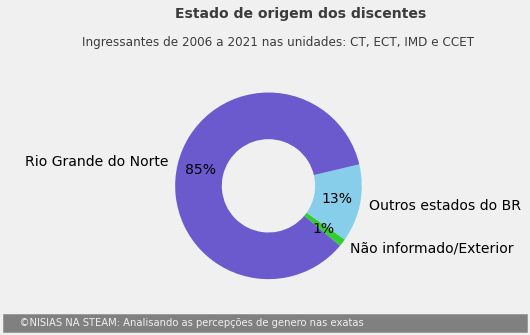

<Figure size 432x288 with 0 Axes>

In [480]:
# declaring data
data = list(df_estado_origem.groupby('estado_origem').agg(lambda x: sum(x)).reset_index()['total'])
keys = list(df_estado_origem.groupby('estado_origem').agg(lambda x: sum(x)).reset_index()['estado_origem'])
# # define Seaborn color palette to use

  
# plotting data on chart
graf = plt.pie(data, labels=keys, colors=['#32CD32','#87CEEB',
                                     '#6A5ACD', '#1E90FF', '#191970','#ADFF2F'], autopct='%.0f%%',
              wedgeprops=dict(width=0.5), startangle=-40, labeldistance=1.1, pctdistance=0.75)

plt.text(x = -1, y = 1.8,
    s = """Estado de origem dos discentes       """,
               fontsize = 14, weight = 'bold', alpha = .75)
plt.title(' ', fontsize=14)
plt.text(x = -2, y = 1.5,
    s = '''Ingressantes de 2006 a 2021 nas unidades: CT, ECT, IMD e CCET''',
               fontsize = 12, alpha = .75)
plt.text(x = -2.8, y = -1.5,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                   ',
         fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

# displaying chart
# plt.tight_layout()
plt.show()
plt.savefig('imagens/origem-pie', format='png')

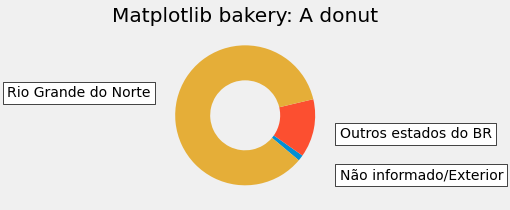

In [446]:
import numpy as np
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = list(df_estado_origem.groupby('estado_origem').agg(lambda x: sum(x)).reset_index()['estado_origem'])

data = list(df_estado_origem.groupby('estado_origem').agg(lambda x: sum(x)).reset_index()['total'])

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

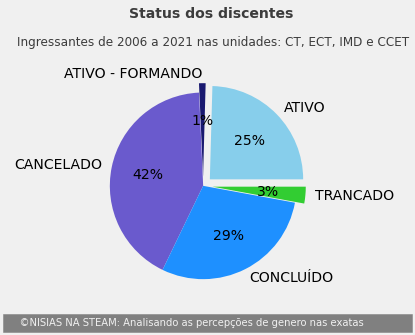

<Figure size 432x288 with 0 Axes>

In [466]:
# declaring data
data = list(df_discentes_unidade[['status', 'matricula']].replace('FORMADO', 'CONCLUÍDO').groupby('status').agg(lambda x: len(x)).reset_index()['matricula'])
keys = list(df_discentes_unidade[['status', 'matricula']].replace('FORMADO', 'CONCLUÍDO').groupby('status').agg(lambda x: len(x)).reset_index()['status'])
# # define Seaborn color palette to use

explode = [0.1, 0.1, 0, 0,0.1]
# plotting data on chart
graf = plt.pie(data, labels=keys, colors=['#87CEEB', '#191970',
                                     '#6A5ACD','#1E90FF', '#32CD32', '#191970','#ADFF2F'], autopct='%.0f%%', explode=explode)

plt.text(x = -0.8, y = 1.8,
    s = """Status dos discentes       """,
               fontsize = 14, weight = 'bold', alpha = .75)
plt.title(' ', fontsize=14)
plt.text(x = -2, y = 1.5,
    s = '''Ingressantes de 2006 a 2021 nas unidades: CT, ECT, IMD e CCET''',
               fontsize = 12, alpha = .75)
plt.text(x = -2.1, y = -1.5,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas              ',
         fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

# displaying chart
# plt.tight_layout()
plt.show()
plt.savefig('imagens/status-pie', format='png')

### Discentes de graduação

In [246]:
df_discentes=pd.DataFrame({})
for i in range(2006,2022):
    arq = 'discentes-{}.csv'.format(str(i))
    df_discentes = df_discentes.append(pd.read_csv(arq, sep=';'), ignore_index=True)

In [247]:
unidades = ['CENTRO DE TECNOLOGIA', 'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'CENTRO DE CIÊNCIAS EXATAS E DA TERRA',
       'INSTITUTO METROPOLE DIGITAL']

In [251]:
df_cursos = pd.read_csv('cursos-de-graduacao.csv', sep=';')

In [252]:
ids_cursos = df_cursos[df_cursos['nome'].isin(cursos)].id_curso

In [253]:
df_discentes_unidade = df_discentes[df_discentes['nome_unidade'].isin(unidades)]
df_discentes_unidade = df_discentes_unidade[df_discentes_unidade['id_curso'].isin(ids_cursos)]

In [254]:
df_discentes_cursos = df_discentes[df_discentes['id_curso'].isin(ids_cursos)]

In [255]:
# filtrando por nivel de ensino = Graduação
df_discentes_unidade = df_discentes_unidade[df_discentes_unidade.nivel_ensino == 'GRADUAÇÃO']

#### Quantidade de pessoas ingressantes do sexo Feminino e Masculino por setor

In [256]:
style.use('fivethirtyeight')

In [257]:
unidade_sexo = pd.crosstab(df_discentes_unidade['nome_unidade'], df_discentes_unidade['sexo']).sort_values(by='F', ascending=False).reset_index()

In [258]:
unidade_sexo.drop(columns=['false'], inplace=True)

In [259]:
unidade_sexo_percent = pd.DataFrame({})
for i in unidade_sexo.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    unidade_sexo_percent = unidade_sexo_percent.append({'nome_unidade': i.nome_unidade, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

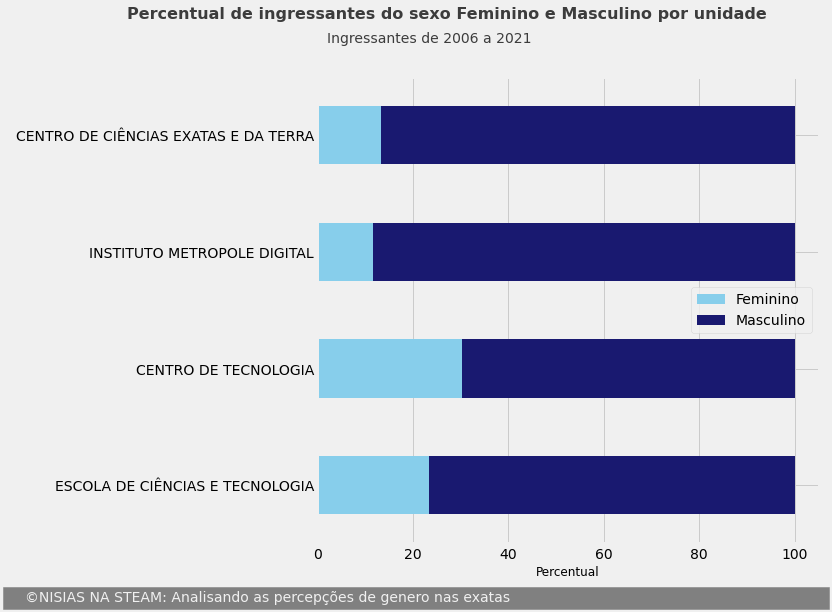

In [260]:
#create stacked bar chart
# figure(figsize=(4, 6), dpi=80)
unidade_sexo_percent.set_index('nome_unidade').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'], figsize=(8, 8))
#add axis titles
plt.xlabel('Percentual',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -40, y = 4,
    s = "Percentual de ingressantes do sexo Feminino e Masculino por unidade",
               fontsize = 16, weight = 'bold', alpha = .75)
plt.text(x = 2, y = 3.8,
    s = '''Ingressantes de 2006 a 2021''',
               fontsize = 14, alpha = .75)
plt.text(x = -65, y = -1,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                                      ',
         fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels

plt.savefig('imagens/ingressantes-barra-unidades', format='png')

### DISCENTES QUE CANCELARAM O CURSO

In [281]:
df_discentes_cancelados= df_discentes_unidade[df_discentes_unidade.status.isin(['CANCELADO', 'TRANCADO'])]

In [326]:
df_discentes_unidade

,matricula,ano_ingresso,periodo_ingresso,id_curso,id_unidade,id_unidade_gestora,nome_discente,sexo,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,nome_curso,modalidade_educacao,nome_unidade,nome_unidade_gestora
5,2.006184e+08,2006,1.0,2000025.0,445.0,445.0,ABRAAO CESARIO VIEIRA,M,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,ENGENHARIA CIVIL,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
9,2.006212e+08,2006,1.0,2000030.0,445.0,445.0,ABRAHAO DA SILVA FONTES,M,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,ENGENHARIA ELÉTRICA,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
96,2.006204e+08,2006,1.0,2000029.0,445.0,445.0,ADRIANO CARLOS AMORIM DE PAIVA SOUSA,M,VESTIBULAR,REGULAR,FORMADO,G,GRADUAÇÃO,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
104,2.006184e+08,2006,1.0,2000025.0,445.0,445.0,ADRIANO ESTEVAM LUCAS DOS SANTOS,M,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,ENGENHARIA CIVIL,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
108,2.006201e+08,2006,2.0,2000026.0,445.0,445.0,ADRIANO JACKSON PESSOA MOTA,M,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,ENGENHARIA DE COMPUTAÇÃO,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256245,2.021009e+10,2021,1.0,92127264.0,6069.0,605.0,YURI FÁBIO ALVES FERREIRA,M,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
256247,2.021001e+10,2021,2.0,10320810.0,4885.0,605.0,YURI FURTADO ELIOTERIO,M,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,ESCOLA DE CIÊNCIAS E TECNOLOGIA,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
256254,2.021002e+10,2021,2.0,2000029.0,445.0,445.0,YURI VICTOR DANTAS DE SOUSA,M,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
256258,2.021006e+10,2021,1.0,92127264.0,6069.0,605.0,YVES PABLO COSTA REGO,M,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [282]:
df_discentes_cancelados = pd.crosstab(df_discentes_cancelados['nome_curso'], df_discentes_cancelados['sexo'], normalize='index').sort_values(by='F').reset_index()

In [283]:
df_discentes_cancelados.drop(columns=['false'], inplace=True)

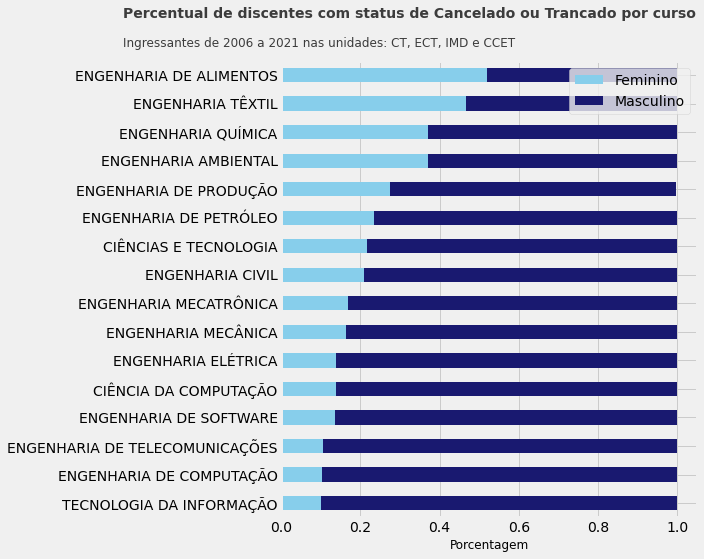

In [388]:

#create stacked bar chart
graf = df_discentes_cancelados.set_index('nome_curso').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'],figsize=(10, 8))
#add axis titles
plt.xlabel('Porcentagem',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -0.4, y = 17,
    s = """Percentual de discentes com status de Cancelado ou Trancado por curso""",
               fontsize = 14, weight = 'bold', alpha = .75)
plt.text(x = -0.4, y = 16,
    s = '''Ingressantes de 2006 a 2021 nas unidades: CT, ECT, IMD e CCET''',
               fontsize = 12, alpha = .75)
# plt.text(x = -1.1, y = -2.5,
#     s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                      ',
#          fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')

plt.tight_layout()
plt.savefig('imagens/cancelados', format='png')

In [353]:
# list(df_discentes_unidade[['status', 'matricula']].replace('FORMADO', 'CONCLUÍDO').groupby('status').agg(lambda x: len(x)).reset_index()['matricula'])
list(df_discentes_unidade[['status', 'matricula']].replace('FORMADO', 'CONCLUÍDO').groupby('status').agg(lambda x: len(x)).reset_index()['status'])

['ATIVO', 'ATIVO - FORMANDO', 'CANCELADO', 'CONCLUÍDO', 'TRANCADO']

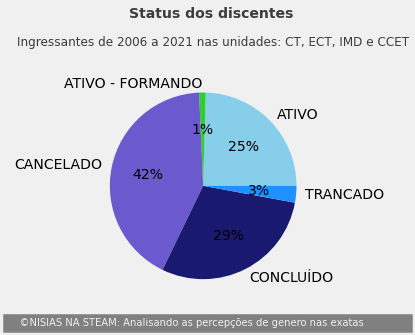

<Figure size 432x288 with 0 Axes>

In [389]:
# declaring data
data = list(df_discentes_unidade[['status', 'matricula']].replace('FORMADO', 'CONCLUÍDO').groupby('status').agg(lambda x: len(x)).reset_index()['matricula'])
keys = list(df_discentes_unidade[['status', 'matricula']].replace('FORMADO', 'CONCLUÍDO').groupby('status').agg(lambda x: len(x)).reset_index()['status'])
# # define Seaborn color palette to use

  
# plotting data on chart
graf = plt.pie(data, labels=keys, colors=['#87CEEB', '#32CD32',
                                     '#6A5ACD','#191970', '#1E90FF', '#191970','#ADFF2F'], autopct='%.0f%%')

plt.text(x = -0.8, y = 1.8,
    s = """Status dos discentes       """,
               fontsize = 14, weight = 'bold', alpha = .75)
plt.title(' ', fontsize=14)
plt.text(x = -2, y = 1.5,
    s = '''Ingressantes de 2006 a 2021 nas unidades: CT, ECT, IMD e CCET''',
               fontsize = 12, alpha = .75)
plt.text(x = -2.1, y = -1.5,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas              ',
         fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

# displaying chart
# plt.tight_layout()
plt.show()
plt.savefig('imagens/status-pie', format='png')

### DISCENTES ATIVOS

In [394]:
df_discentes_ativos= df_discentes_unidade[df_discentes_unidade.status.isin(['ATIVO - FORMANDO', 'ATIVO'])]
df_discentes_ativos = pd.crosstab(df_discentes_ativos['nome_curso'], df_discentes_ativos['sexo'], normalize='index').sort_values(by='F').reset_index()
# df_discentes_ativos.drop(columns=['false'], inplace=True)

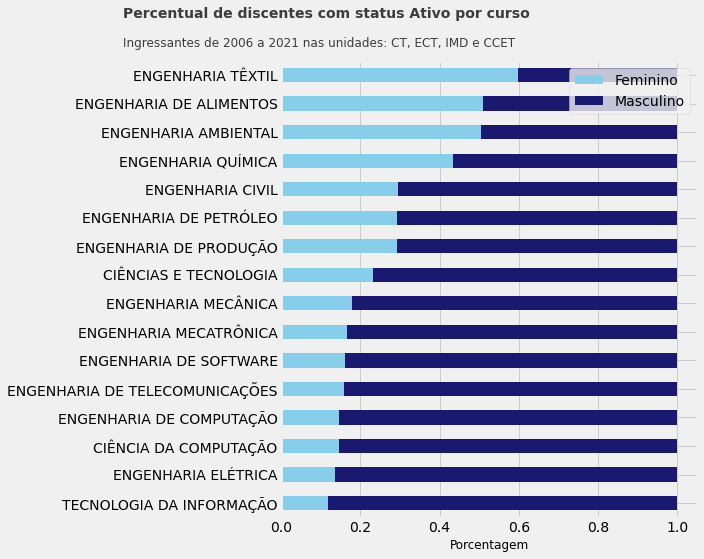

In [395]:

#create stacked bar chart
graf = df_discentes_ativos.set_index('nome_curso').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'],figsize=(10, 8))
#add axis titles
plt.xlabel('Porcentagem',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -0.4, y = 17,
    s = """Percentual de discentes com status Ativo por curso""",
               fontsize = 14, weight = 'bold', alpha = .75)
plt.text(x = -0.4, y = 16,
    s = '''Ingressantes de 2006 a 2021 nas unidades: CT, ECT, IMD e CCET''',
               fontsize = 12, alpha = .75)
# plt.text(x = -1.1, y = -2.5,
#     s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                      ',
#          fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')

plt.tight_layout()
plt.savefig('imagens/ativos', format='png')

In [52]:
# # declaring data
# data = unidade_sexo[unidade_sexo.nome_unidade == 'CENTRO DE TECNOLOGIA'][['F',"M"]].values[0]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes ingressantes por sexo no CT')
# # displaying chart
# # plt.savefig('ingressantes-ct-pie', format='png')
# # plt.show()

In [18]:
df_discentes.nome_unidade.unique()

array(['CENTRO DE TECNOLOGIA', 'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'CENTRO DE CIÊNCIAS EXATAS E DA TERRA',
       'INSTITUTO METROPOLE DIGITAL'], dtype=object)

In [53]:
# # declaring data
# data = unidade_sexo[unidade_sexo.nome_unidade == 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA'][['F',"M"]].values[0]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes ingressantes por sexo no CCET')
# # # displaying chart
# # plt.savefig('ingressantes-ccet-pie.png', format='png')
# # plt.show()


In [54]:
# # declaring data
# data = unidade_sexo[unidade_sexo.nome_unidade == 'INSTITUTO METROPOLE DIGITAL'][['F',"M"]].values[0]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes ingressantes por sexo no IMD')
# # displaying chart
# plt.savefig('ingressantes-imd-pie.png', format='png')
# plt.show()

### Percentual de pessoas formadas do sexo Feminino e Masculino por setor

In [57]:
formados = df_discentes_unidade[(df_discentes_unidade.status=='CONCLUÍDO') | (df_discentes_unidade.status=='FORMADO')]
unidade_sexo_formados = pd.crosstab(formados['nome_unidade'], formados['sexo']).sort_values(by='F', ascending=False).reset_index()

In [138]:
unidade_sexo_formados

sexo,nome_unidade,F,M,false
0,CENTRO DE TECNOLOGIA,1414,2350,1
1,ESCOLA DE CIÊNCIAS E TECNOLOGIA,858,2247,3
2,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,676,1224,0
3,INSTITUTO METROPOLE DIGITAL,69,376,0


In [60]:
# # declaring data
# data = unidade_sexo_formados[unidade_sexo_formados.nome_unidade == 'INSTITUTO METROPOLE DIGITAL'][['F',"M"]].values[0]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes formados por sexo no IMD')
# # displaying chart
# plt.savefig('formados-imd-pie', format='png')
# plt.show()

In [59]:
# # declaring data
# data = unidade_sexo_formados[unidade_sexo_formados.nome_unidade == 'ESCOLA DE CIÊNCIAS E TECNOLOGIA'][['F',"M"]].values[0]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes formados por sexo na ECT')
# # displaying chart
# plt.savefig('formados-ect-pie', format='png')
# plt.show()

In [58]:
# # declaring data
# data = unidade_sexo_formados[unidade_sexo_formados.nome_unidade == 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA'][['F',"M"]].values[0]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes formados por sexo no CCET')
# plt.savefig('formados-ccet-pie', format='png')
# # displaying chart
# plt.show()

In [56]:
# # declaring data
# data = unidade_sexo_formados[unidade_sexo_formados.nome_unidade == 'CENTRO DE TECNOLOGIA'][['F',"M"]].values[0]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes formados por sexo no CT', fontsize=14)
# plt.savefig('formados-ct-pie', format='png')
# # displaying chart
# plt.show()

In [57]:
# # declaring data
# data = [unidade_sexo_formados.F.sum(), unidade_sexo_formados.M.sum()]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes formados por sexo nos setores: CT, ECT, IMD e CCET', fontsize=14)
# plt.savefig('formados-exatas-pie', format='png')
# # displaying chart
# plt.show()

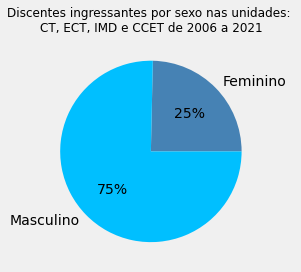

In [305]:
# declaring data
data = [unidade_sexo.F.sum(), unidade_sexo.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('''Discentes ingressantes por sexo nas unidades: 
CT, ECT, IMD e CCET de 2006 a 2021''', fontsize=12)
plt.tight_layout()
plt.savefig('ingressantes-exatas-pie', format='png')
# displaying chart
plt.show()

In [161]:
df_discentes[df_discentes['status']=='CONCLUÍDO'].sexo.value_counts()

M        4759
F        2001
false       4
Name: sexo, dtype: int64

In [203]:
ano_sexo = pd.crosstab(df_discentes_unidade['ano_ingresso'], df_discentes_unidade['sexo']).reset_index()

In [125]:
ano_sexo[ano_sexo['ano_ingresso']>=2018]

sexo,ano_ingresso,F,M,false
12,2018,563,1883,0
13,2019,545,1828,0
14,2020,591,1693,0
15,2021,555,1575,0


In [126]:
ano_sexo

sexo,ano_ingresso,F,M,false
0,2006,130,466,0
1,2007,137,475,0
2,2008,147,482,0
3,2009,313,911,0
4,2010,475,1277,0
5,2011,460,1353,1
6,2012,495,1366,3
7,2013,609,1626,0
8,2014,575,1656,1
9,2015,548,1749,0


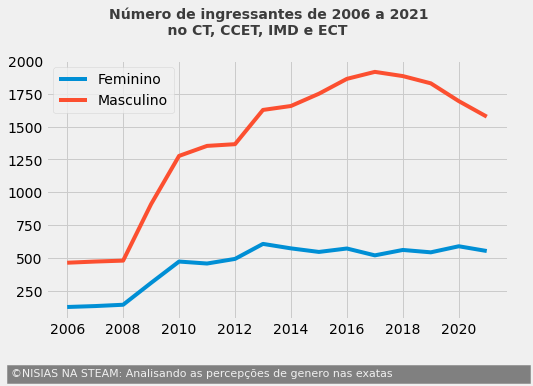

In [217]:
from matplotlib.pyplot import figure

figure(figsize=(7.5, 6))

plt.plot(ano_sexo['ano_ingresso'], ano_sexo['F'], label='Feminino')
plt.plot(ano_sexo['ano_ingresso'], ano_sexo['M'], label = 'Masculino')
plt.legend(['Feminino', 'Masculino'], loc='upper left')
plt.text(x = 2007.5, y = 2200,
    s = '''Número de ingressantes de 2006 a 2021 
            no CT, CCET, IMD e ECT''',
               fontsize = 14, weight = 'bold', alpha = .75)
# plt.text(x = 0.5, y = -0.09,
#     s = '''  Discordo''',fontsize = 12, color = '#000000')
# plt.text(x = 6.5, y = -0.09,
#     s = '  Concordo',fontsize = 12, color = '#000000')
plt.text(x = 2004, y = -400, 
    s = '©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                      ',fontsize = 11, color = '#f0f0f0', backgroundcolor = 'grey')
plt.tight_layout()
plt.savefig('imagens/ingressantes-barra.png')
plt.show()

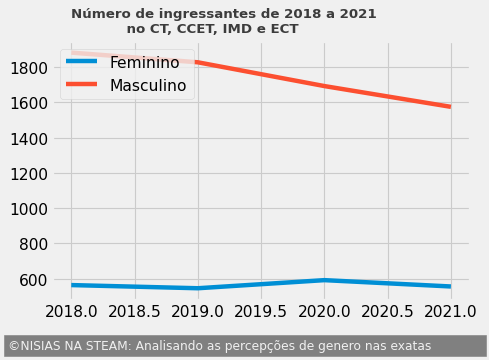

In [205]:
from matplotlib.pyplot import figure

figure(figsize=(6, 4), dpi=80)
ano2018_2021 = ano_sexo[ano_sexo['ano_ingresso']>=2018]

plt.plot(ano2018_2021['ano_ingresso'], ano2018_2021['F'], label='Feminino')
plt.plot(ano2018_2021['ano_ingresso'], ano2018_2021['M'], label = 'Masculino')
plt.legend(['Feminino', 'Masculino'], loc='upper left')
plt.text(x = 2018, y = 2000,
    s = '''Número de ingressantes de 2018 a 2021 
            no CT, CCET, IMD e ECT''',
               fontsize = 12, weight = 'bold', alpha = .75)
# plt.text(x = 0.5, y = -0.09,
#     s = '''  Discordo''',fontsize = 12, color = '#000000')
# plt.text(x = 6.5, y = -0.09,
#     s = '  Concordo',fontsize = 12, color = '#000000')
plt.text(x = 2017.5, y = 200, 
    s = '©NISIAS NA STEAM: Analisando as percepções de genero nas exatas             ',fontsize = 11, color = '#f0f0f0', backgroundcolor = 'grey')
# plt.tight_layout()
plt.savefig('ingressantes-barra-2018-2021', format='png')
plt.show()

In [279]:
ano_sexo_percent = pd.DataFrame({})
for i in ano_sexo.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    ano_sexo_percent = ano_sexo_percent.append({'ano_ingresso': i.ano_ingresso, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

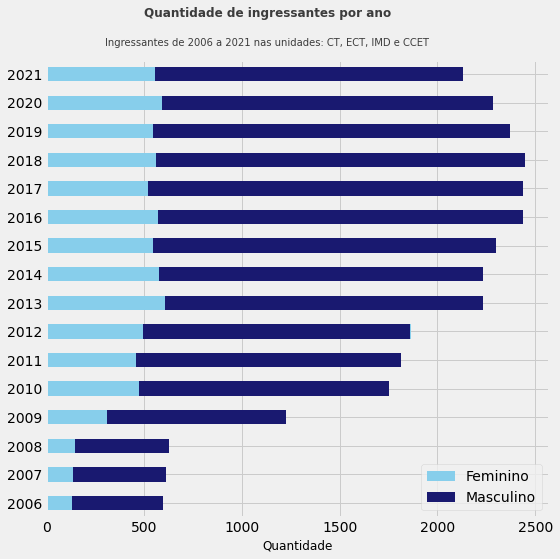

In [325]:
#create stacked bar chart
graf = ano_sexo.set_index('ano_ingresso').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'],figsize=(8, 8))
#add axis titles
plt.xlabel('Quantidade',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = 500, y = 17,
    s = """Quantidade de ingressantes por ano""",
               fontsize = 12, weight = 'bold', alpha = .75)
plt.text(x = 300, y = 16,
    s = '''Ingressantes de 2006 a 2021 nas unidades: CT, ECT, IMD e CCET''',
               fontsize = 10, alpha = .75)

# plt.text(x = -0.15, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2010].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 0.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2011].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 1.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2012].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 2.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2013].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 3.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2014].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 4.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2015].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 5.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2016].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 6.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2017].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 7.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2018].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 8.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2019].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x =9.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2020].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = 10.85, y = 7,
#     s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2021].percent_F.unique()[0].round(2))+'%',
#                fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = -2, y = -50,
#     s = '©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                       ',fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels
plt.tight_layout()
plt.savefig('ingressantes-barra-ano', format='png')

In [120]:
ano_sexo_percent[ano_sexo_percent.ano_ingresso==2010].percent_F.unique().round(2)

array([29.65])

In [349]:
ingres_2018_2021 = df_discentes_unidade[(df_discentes_unidade.ano_ingresso>2017)]
anos_2018_2021_sexo = pd.crosstab(ingres_2018_2021['nome_unidade'], ingres_2018_2021['sexo']).sort_values(by='F', ascending=False).reset_index()

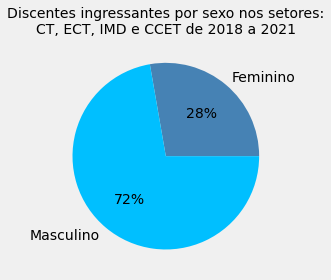

In [355]:
# declaring data
data = [anos_2018_2021_sexo.F.sum(), anos_2018_2021_sexo.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('''Discentes ingressantes por sexo nos setores:
CT, ECT, IMD e CCET de 2018 a 2021''', fontsize=14)
# plt.savefig('ingressantes-exatas-pie', format='png')
# displaying chart
plt.show()

In [55]:
# ingres = df_discentes_unidade[(df_discentes_unidade.ano_ingresso==2017)]
# anos_sexo = pd.crosstab(ingres['nome_unidade'], ingres['sexo']).sort_values(by='F', ascending=False).reset_index()
# # declaring data
# data = [anos_sexo.F.sum(), anos_sexo.M.sum()]
# keys = ['Feminino', 'Masculino']
  
# # # define Seaborn color palette to use
# palette_color = sns.color_palette("Blues_r")
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
# plt.title('Discentes ingressantes por sexo nos setores: CT, ECT, IMD e CCET', fontsize=14)
# # plt.savefig('ingressantes-exatas-pie', format='png')
# # displaying chart
# plt.show()

# Quantidade de ingressantes por curso

In [328]:
df_discentes_cursos.sexo.value_counts()

M        19783
F         6512
false        6
Name: sexo, dtype: int64

In [218]:
curso_sexo = pd.crosstab(df_discentes_cursos['nome_curso'], df_discentes_cursos['sexo']).sort_values(by='F', ascending=False).reset_index()

In [219]:
curso_sexo_percent = pd.DataFrame({})
for i in curso_sexo.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    curso_sexo_percent = curso_sexo_percent.append({'nome_curso': i.nome_curso, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

In [220]:
curso_sexo_percent = curso_sexo_percent.sort_values(by=['percent_F','percent_M'])

In [230]:
curso_sexo_percent

,nome_curso,percent_F,percent_M
6,TECNOLOGIA DA INFORMAÇÃO,11.633493,88.366507
11,ENGENHARIA DE COMPUTAÇÃO,12.659698,87.340302
12,CIÊNCIA DA COMPUTAÇÃO,12.929293,87.070707
15,ENGENHARIA DE TELECOMUNICAÇÕES,13.200000,86.800000
14,ENGENHARIA DE SOFTWARE,14.068441,85.931559
8,ENGENHARIA ELÉTRICA,14.384422,85.615578
9,ENGENHARIA MECÂNICA,14.446228,85.553772
13,ENGENHARIA MECATRÔNICA,16.727273,83.272727
0,CIÊNCIAS E TECNOLOGIA,23.378921,76.621079
3,ENGENHARIA CIVIL,27.457441,72.542559


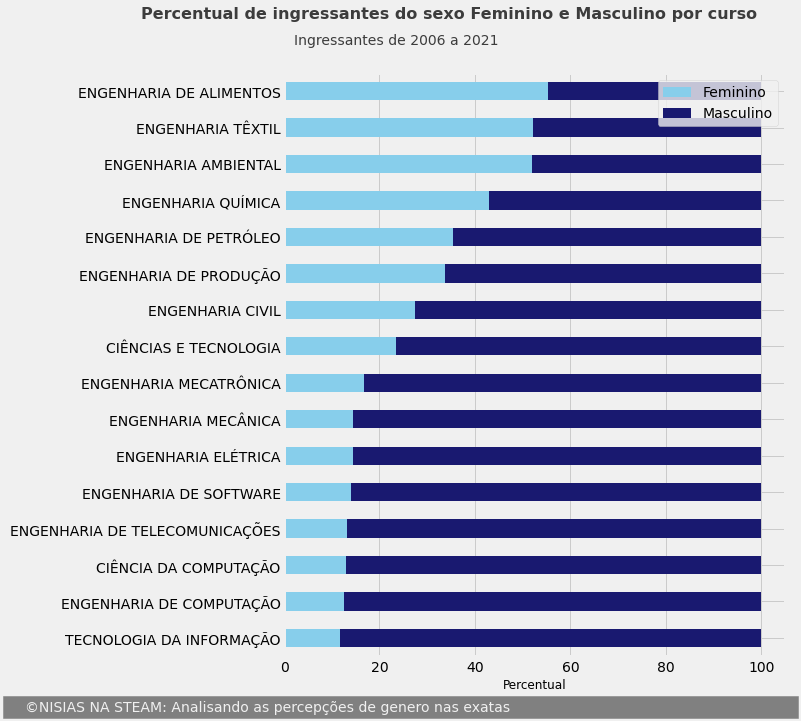

In [260]:
#create stacked bar chart
# figure(figsize=(4, 6), dpi=80)
curso_sexo_percent.set_index('nome_curso').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'], figsize=(8, 10))

#add axis titles
plt.xlabel('Percentual',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -30, y = 17,
    s = "Percentual de ingressantes do sexo Feminino e Masculino por curso",
               fontsize = 16, weight = 'bold', alpha = .75)
plt.text(x = 2, y = 16.3,
    s = '''Ingressantes de 2006 a 2021''',
               fontsize = 14, alpha = .75)
plt.text(x = -58, y = -2,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                               ',
         fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels

plt.savefig('ingressantes-barra-cursos', format='png')

In [263]:
df_discentes_cursos_formados = df_discentes_cursos[df_discentes_cursos.ano_ingresso<2016]

In [264]:
formados_cursos = pd.crosstab(df_discentes_cursos_formados[(df_discentes_cursos_formados.status=='CONCLUÍDO') | (df_discentes_cursos_formados.status=='FORMADO')]['nome_curso'],
                              df_discentes_cursos_formados[(df_discentes_cursos_formados.status=='CONCLUÍDO') | (df_discentes_cursos_formados.status=='FORMADO')]['sexo']).sort_values(
    by='F', ascending=False).reset_index()

In [265]:
curso_sexo_percent_formados = pd.DataFrame({})
for i in formados_cursos.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    curso_sexo_percent_formados = curso_sexo_percent_formados.append({'nome_curso': i.nome_curso, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

In [266]:
curso_sexo_percent_formados = curso_sexo_percent_formados.sort_values(by=['percent_F','percent_M'])

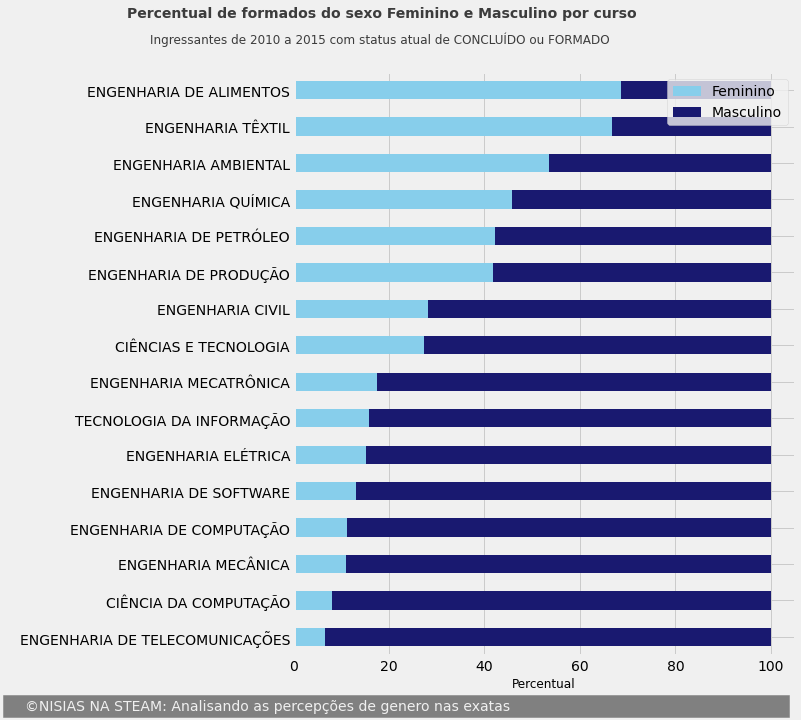

In [278]:
#create stacked bar chart
graf = curso_sexo_percent_formados.set_index('nome_curso').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'], figsize=(8, 10))
#add axis titles
plt.xlabel('Percentual',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -35, y = 17,
    s = "Percentual de formados do sexo Feminino e Masculino por curso",
               fontsize = 14, weight = 'bold', alpha = .75)
plt.text(x = -30, y = 16.3,
    s = '''Ingressantes de 2010 a 2015 com status atual de CONCLUÍDO ou FORMADO''',
               fontsize = 12, alpha = .75)
plt.text(x = -60, y = -2,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                             ',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels

plt.savefig('formados-barra-cursos', format='png')

### Cursos Saúde

In [340]:
df_discentes_grad = df_discentes[df_discentes.nivel_ensino=='GRADUAÇÃO']

In [341]:
unidades_saude = ['CENTRO DE CIÊNCIAS DA SAÚDE', 'FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA','ESCOLA DE SAÚDE', 'ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE']
df_discentes_grad_saude = df_discentes_grad[df_discentes_grad.nome_unidade.isin(unidades_saude)]

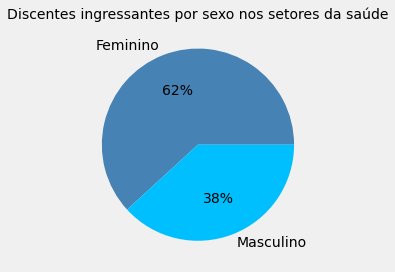

In [345]:
unidades_saude_sexo = pd.crosstab(df_discentes_grad_saude['nome_curso'], df_discentes_grad_saude['sexo']).sort_values(by='F', ascending=False).reset_index()
# declaring data
data = [unidades_saude_sexo.F.sum(), unidades_saude_sexo.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes ingressantes por sexo nos setores da saúde', fontsize=14)
plt.tight_layout()
plt.savefig('ingressantes-saude-pie', format='png')
# displaying chart
plt.show()

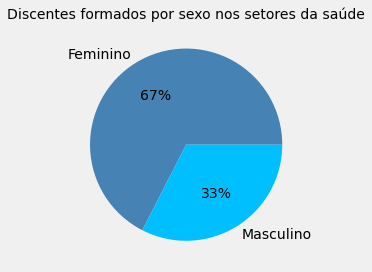

In [346]:
formados_saude = df_discentes_grad_saude[(df_discentes_grad_saude.status=='CONCLUÍDO') | (df_discentes_grad_saude.status=='FORMADO')]
unidades_saude_sexo_formados = pd.crosstab(formados_saude['nome_curso'], formados_saude['sexo']).sort_values(by='F', ascending=False).reset_index()
# declaring data
data = [unidades_saude_sexo_formados.F.sum(), unidades_saude_sexo_formados.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes formados por sexo nos setores da saúde', fontsize=14)
plt.tight_layout()
plt.savefig('formados-saude-pie', format='png')
# displaying chart
plt.show()

# Dados de docentes

In [184]:
df_docentes=pd.read_csv('docentes.csv', sep=';')

In [185]:
df_docentes.lotacao.unique()

array(['NÚCLEO DE EDUCAÇÃO DA INFÂNCIA', 'ESCOLA AGRÍCOLA DE JUNDIAÍ',
       'ESCOLA DE MÚSICA', 'INSTITUTO METROPOLE DIGITAL',
       'ESCOLA DE SAÚDE', 'EDITORA UNIVERSITÁRIA',
       'PRÓ-REITORIA DE EXTENSÃO UNIVERSITÁRIA',
       'SECRETARIA DE EDUCAÇÃO A DISTÂNCIA', 'PRÓ-REITORIA DE GRADUAÇÃO',
       'CERES - DEPARTAMENTO DE HISTÓRIA', 'DEPARTAMENTO DE PEDIATRIA',
       'DEPARTAMENTO DE ENGENHARIA CIVIL E AMBIENTAL',
       'DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES',
       'ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE',
       'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'DEPARTAMENTO DE ENGENHARIA DE COMPUTACAO E AUTOMACAO',
       'INSTITUTO DE QUÍMICA', 'DEPARTAMENTO DE GEOFÍSICA',
       'DEPARTAMENTO DE CIÊNCIAS CONTÁBEIS - DCC',
       'DEPARTAMENTO DE ENGENHARIA MECANICA',
       'DEPARTAMENTO DE FUNDAMENTOS E POLÍTICAS DA EDUCAÇÃO',
       'DEPARTAMENTO DE FARMACIA',
       'DEPARTAMENTO DE ANÁLISES CLÍNICAS E TOXICOLÓGICAS',
       'DEPARTAMENTO DE ODO

In [178]:
lotacao = ['INSTITUTO METROPOLE DIGITAL',
       'DEPARTAMENTO DE ENGENHARIA CIVIL E AMBIENTAL',
       'DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES',
       'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'DEPARTAMENTO DE ENGENHARIA DE COMPUTACAO E AUTOMACAO',
       'DEPARTAMENTO DE ENGENHARIA MECANICA',
       'DEPARTAMENTO DE COMPUTAÇÃO E TECNOLOGIA',
       'DEPARTAMENTO DE ENGENHARIA DE PETROLEO',
       'DEPARTAMENTO DE ENGENHARIA ELÉTRICA',
       'DEPARTAMENTO DE ENGENHARIA DE MATERIAIS',
       'DEPARTAMENTO DE ENGENHARIA QUIMICA',
       'DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA',
       'DEPARTAMENTO DE ENGENHARIA PRODUÇÃO',
       'DEPARTAMENTO DE ENGENHARIA BIOMEDICA',
       'DEPARTAMENTO DE ENGENHARIA TÊXTIL',
       'DEPARTAMENTO DE ENGENHARIA DE ALIMENTOS']

In [179]:
id_unidades_filtro = lotacao
df_docentes = df_docentes[df_docentes.lotacao.isin(id_unidades_filtro)]

In [23]:
df_docentes[df_docentes.lotacao=='DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA'].sexo.value_counts()

M    28
F     9
Name: sexo, dtype: int64

In [180]:
lotacao_sexo = pd.crosstab(df_docentes['lotacao'], df_docentes['sexo']).sort_values(by=['F','M'], ascending=False).reset_index()

In [181]:
lotacao_sexo_percent = pd.DataFrame({})
for i in lotacao_sexo.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    lotacao_sexo_percent = lotacao_sexo_percent.append({'lotacao': i.lotacao, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

In [182]:
lotacao_sexo_percent = lotacao_sexo_percent.sort_values(by='percent_F')

Text(-95, -5, '   ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                 ')

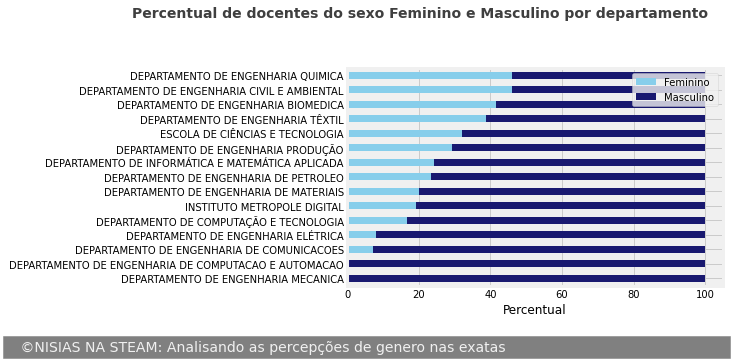

In [183]:
#create stacked bar chart
graf = lotacao_sexo_percent.set_index('lotacao').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'])
#add axis titles
plt.xlabel('Percentual',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -60, y = 18,
    s = "Percentual de docentes do sexo Feminino e Masculino por departamento",
               fontsize = 14, weight = 'bold', alpha = .75)
plt.text(x = -95, y = -5,
    s = '   ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                 ',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels
# plt.tight_layout()
# plt.savefig('docentes-barra-depto', format='png')

In [46]:
df_docentes.columns

Index(['siape', 'nome', 'sexo', 'formacao', 'tipo_jornada_trabalho', 'vinculo',
       'categoria', 'classe_funcional', 'id_unidade_lotacao', 'lotacao',
       'admissao'],
      dtype='object')

In [104]:
#normalizando os dados
def normaliza_valores(df):
    for coluna in df.columns[1:3]:
        df[coluna] = df[coluna]/df[coluna].sum()

In [196]:
df_docentes_av = pd.read_csv('avaliacaodocencia.csv', sep=';')

In [197]:
df_docentes_av

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
0,15370,FERNANDO MOREIRA DA SILVA,1209923,2013,2,14,9.17,1.34,8.13,2.70,7.61,2.53
1,15370,FERNANDO MOREIRA DA SILVA,1222008,2014,1,15,9.44,0.92,7.17,3.08,8.71,1.72
2,15370,FERNANDO MOREIRA DA SILVA,1222218,2014,1,38,9.19,1.67,6.77,3.29,8.12,2.53
3,15370,FERNANDO MOREIRA DA SILVA,1229520,2014,2,13,9.06,1.16,7.68,2.51,7.62,2.77
4,15370,FERNANDO MOREIRA DA SILVA,1229545,2014,2,24,9.27,1.28,8.45,1.72,8.48,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...
118153,5762088,JESSICA LIMA DE MORAIS,57675839,2021,1,7,9.97,0.17,9.59,1.06,NaN,NaN
118154,5762088,JESSICA LIMA DE MORAIS,57675840,2021,1,7,8.48,2.10,8.52,1.95,NaN,NaN
118155,5762088,JESSICA LIMA DE MORAIS,57675841,2021,1,7,8.37,2.07,8.28,2.08,NaN,NaN
118156,5762088,JESSICA LIMA DE MORAIS,57675842,2021,1,8,9.88,0.33,9.60,0.76,NaN,NaN


In [198]:
df_docentes_merge = pd.merge(df_docentes[['nome', 'sexo']], 
                             df_docentes_av[df_docentes_av['nome_docente'].isin(df_docentes.nome)],
                             left_on='nome', right_on='nome_docente')
#df_docentes[['nome', 'sexo']]
#df_docentes_av[df_docentes_av['nome_docente'].isin(df_docentes.nome)]

In [199]:
df_media_post_profis = df_docentes_merge[['nome', 'postura_profissional_media', 'atuacao_profissional_media', 'sexo']].groupby(['nome', 'sexo']).agg(lambda x: (sum(x))/len(x)).reset_index()

In [200]:
df_media_post_profis

,nome,sexo,postura_profissional_media,atuacao_profissional_media
0,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,8.973600,8.656800
1,ACYNELLY DAFNE DA SILVA NUNES,F,9.779000,9.680000
2,ADA CRISTINA SCUDELARI,F,8.919259,8.310000
3,ADA LIMA FERREIRA DE SOUSA,F,9.620816,9.167143
4,ADAILDO GOMES D ASSUNCAO,M,9.086765,9.013824
...,...,...,...,...
2423,ZORAIDE SOUZA PESSOA,F,8.799000,8.569333
2424,ZORANO SERGIO DE SOUZA,M,9.320217,8.553696
2425,ZULEIDE MARIA CARVALHO LIMA,F,8.994348,8.770000
2426,ZULMARA VIRGINIA DE CARVALHO,F,9.325581,9.064651


In [202]:
df_media_post_profis_atua = df_media_post_profis[['postura_profissional_media', 'atuacao_profissional_media', 'sexo']].groupby('sexo').agg(lambda x: (sum(x))/len(x)).reset_index()

In [203]:
df_media_post_profis_atua

,sexo,postura_profissional_media,atuacao_profissional_media
0,F,9.434406,9.132940
1,M,9.304327,8.966405


In [81]:
normaliza_valores(df_media_post_profis)

In [84]:
df_media_post_profis_atua

,sexo,postura_profissional_media,atuacao_profissional_media
0,F,0.002276,0.002286
1,M,0.002265,0.002262


pegar quantidade de bolsistas
pegar quantidade de homens e mulheres q vao pra pos graduação
pegar quantidade de homens e mulheres nos cursos da saúde
o tempo de atuação implica em se sentir mais confortavel p expressar ideias?